In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


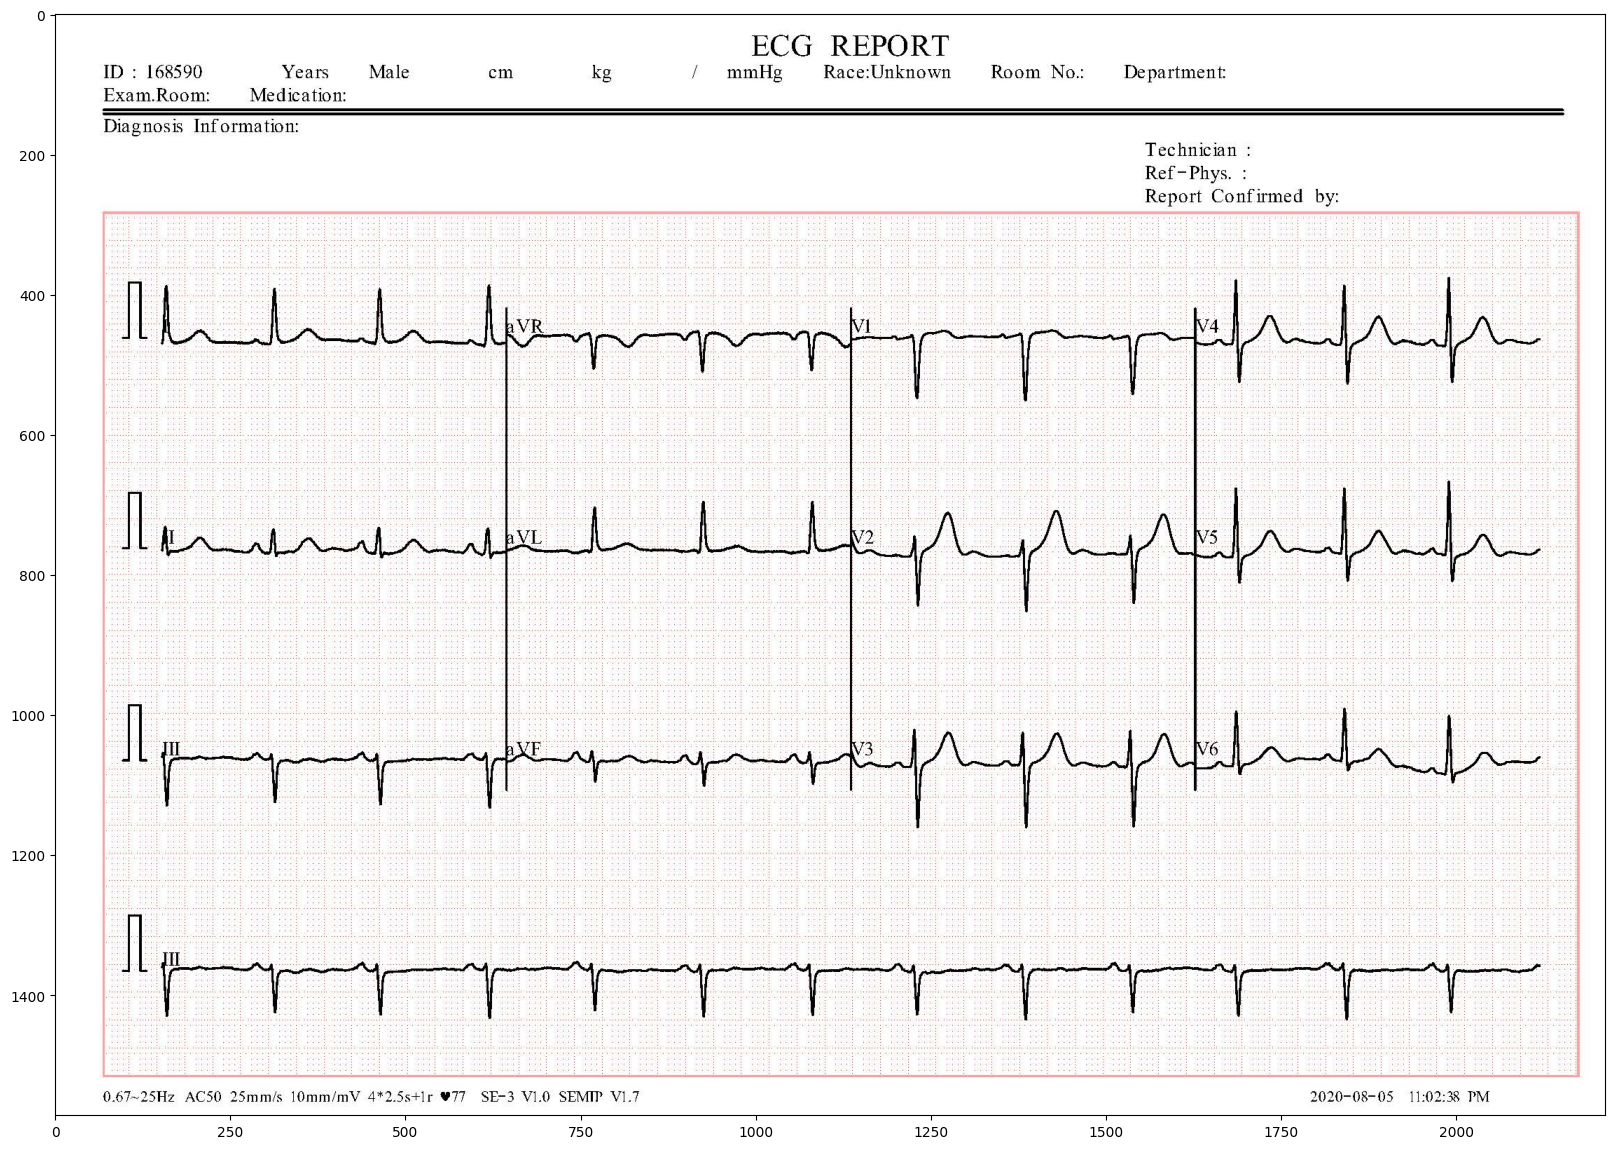

In [ ]:
from skimage.io import imread
from skimage import color
import matplotlib.pyplot as plt

fig0 , ax0 = plt.subplots()

fig0.set_size_inches(20, 20)

image=imread('/content/drive/MyDrive/ECG_IMAGES_DATASET/Normal Person ECG Images (284x12=3408)/Normal(1).jpg')

ax0.imshow(image)


In [ ]:
#dividing the ECG leads from 1-13 from the above image
Lead_1 = image[300:600, 150:643]
Lead_2 = image[300:600, 646:1135]
Lead_3 = image[300:600, 1140:1625]
Lead_4 = image[300:600, 1630:2125]
Lead_5 = image[600:900, 150:643]
Lead_6 = image[600:900, 646:1135]
Lead_7 = image[600:900, 1140:1625]
Lead_8 = image[600:900, 1630:2125]
Lead_9 = image[900:1200, 150:643]
Lead_10 = image[900:1200, 646:1135]
Lead_11 = image[900:1200, 1140:1625]
Lead_12 = image[900:1200, 1630:2125]
Lead_13 = image[1250:1480, 150:2125]

Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

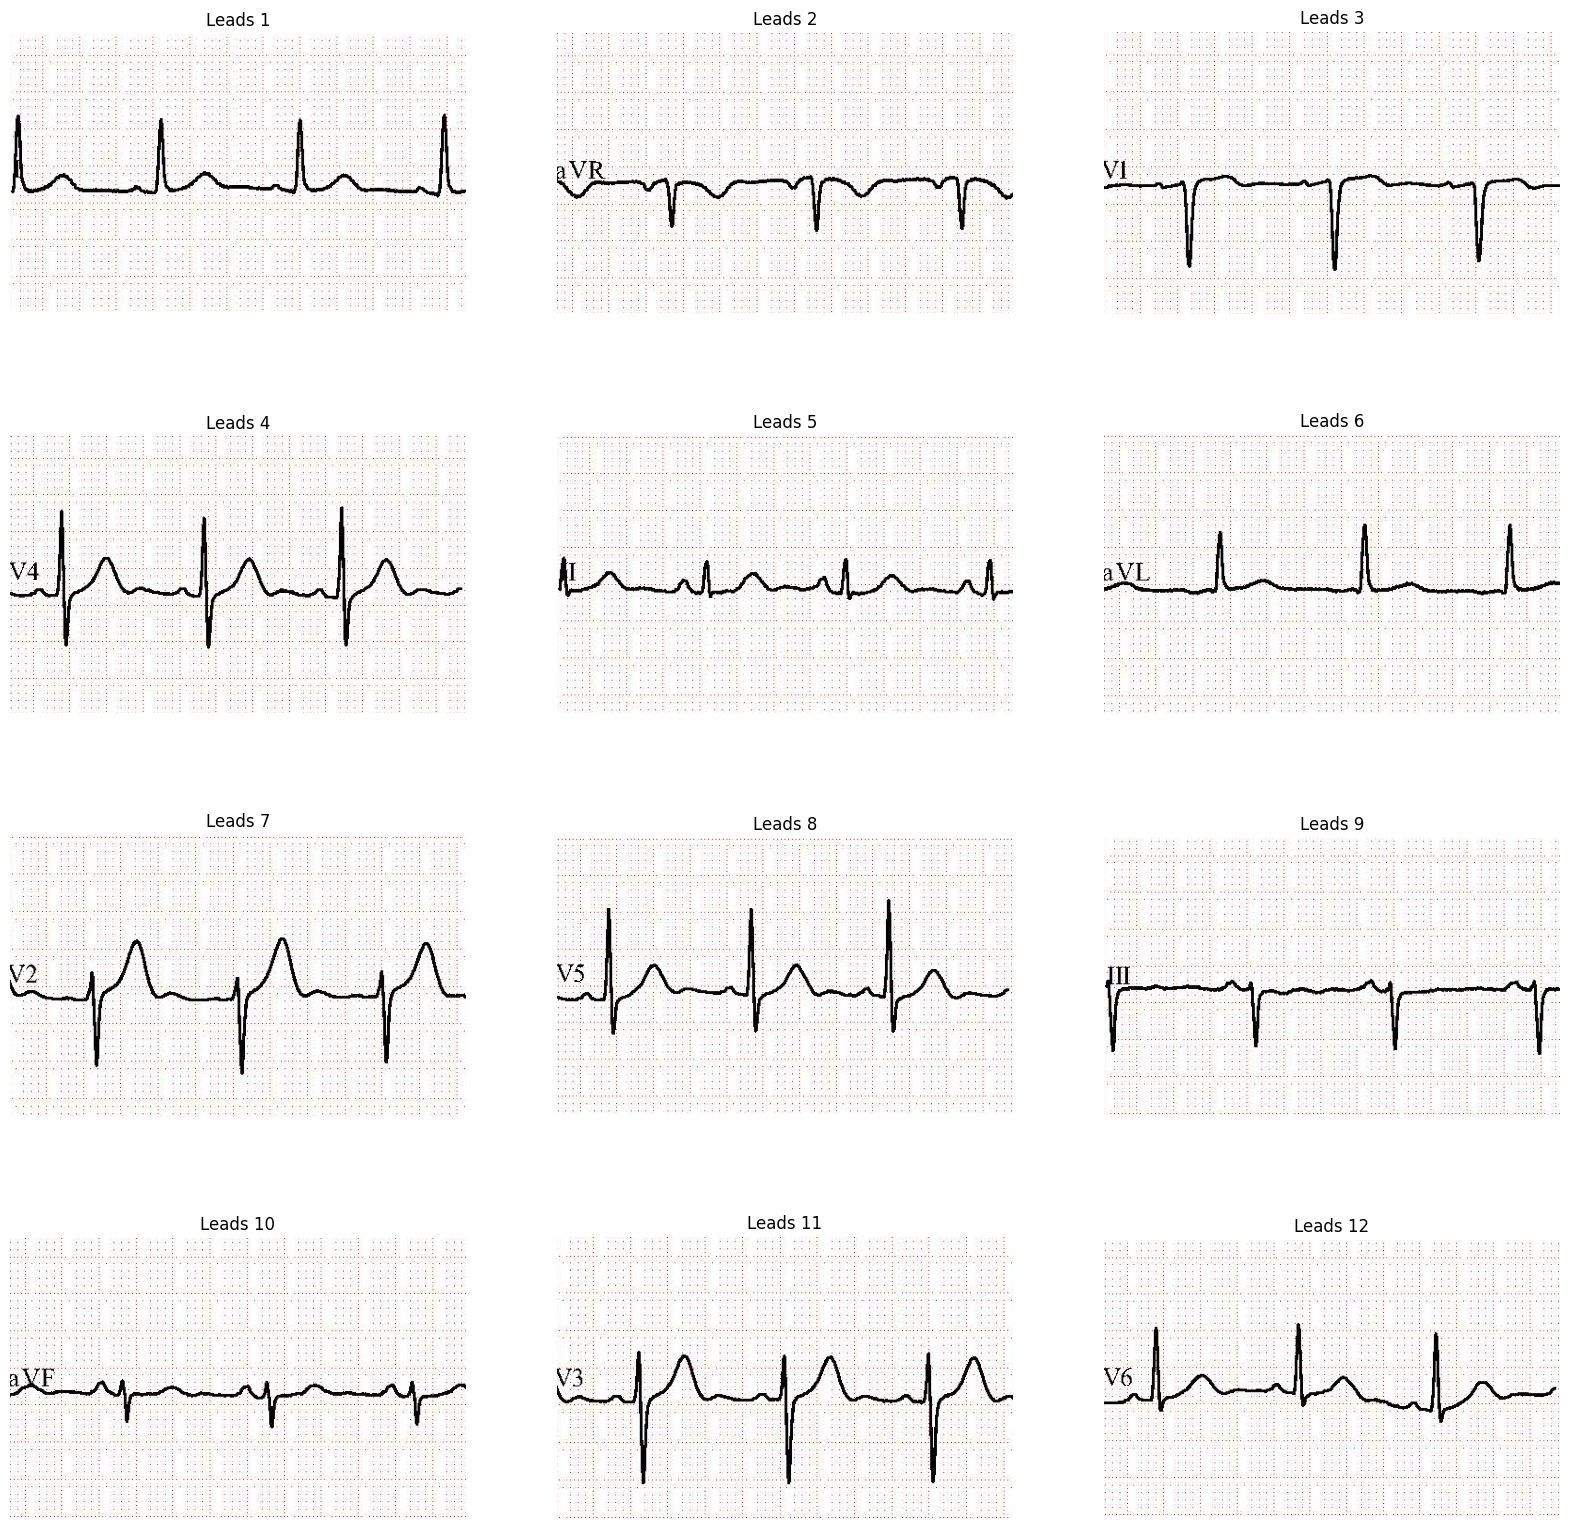

In [ ]:
from skimage.segmentation import slic
from skimage.color import label2rgb

#plotting lead 1-12
fig , ax = plt.subplots(4,3)

fig.set_size_inches(20, 20)

x_counter=0
y_counter=0


for x,y in enumerate(Leads[:len(Leads)-1]):
  if (x+1)%3==0:
    ax[x_counter][y_counter].imshow(y)
    ax[x_counter][y_counter].axis('off')
    ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
    x_counter+=1
    y_counter=0
  else:
    ax[x_counter][y_counter].imshow(y)
    ax[x_counter][y_counter].axis('off')
    ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
    y_counter+=1

#plot the image
plt.show()

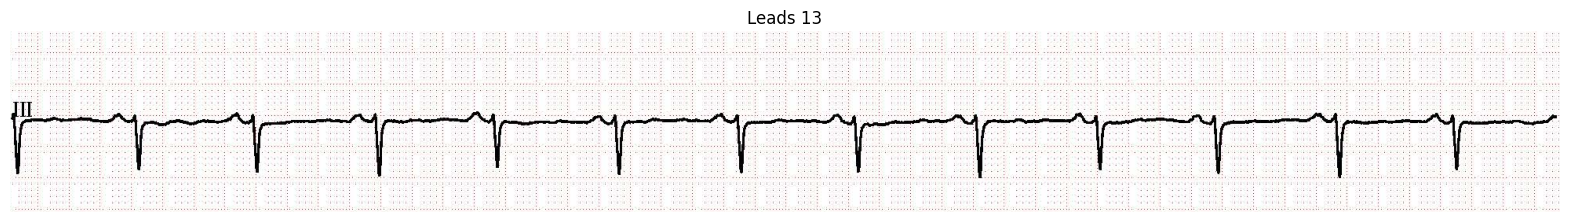

In [ ]:
#plotting lead 13
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(20, 20)

ax1.imshow(Lead_13)
ax1.set_title("Leads 13")
ax1.axis('off')
plt.show()

#### **TRANSFORMAING ECG IMAGES: REMOVING GRIDLINES/ PERFROM THRESHOLDING,  BINARIZATION, GAUSSIAN FILTERING**

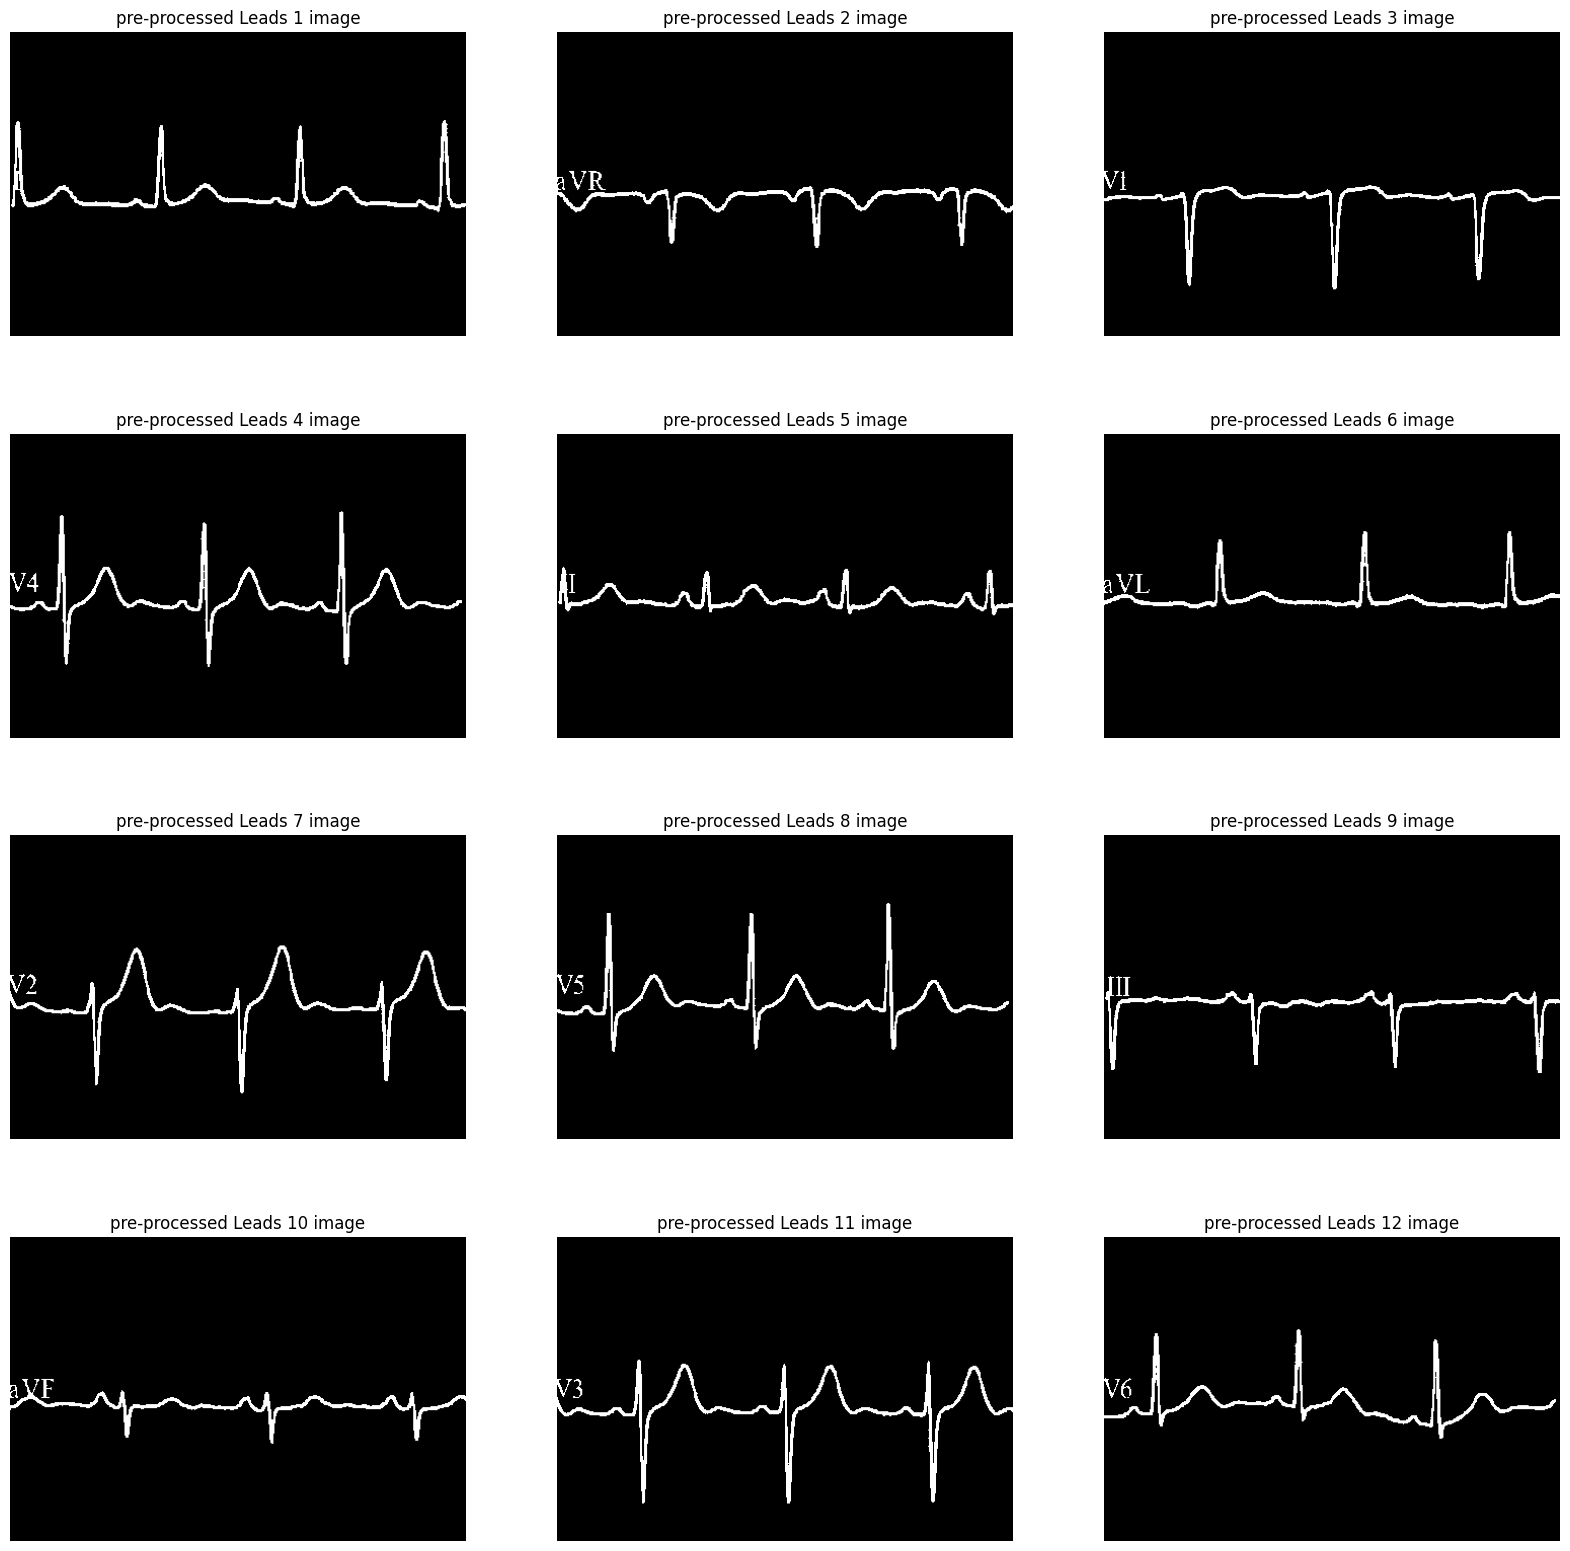

In [ ]:
#importing gaussian filter and otsu threshold
from skimage.filters import threshold_otsu,gaussian
from skimage.transform import resize
from numpy import asarray

#creating subplot of size(4,3) 4 rows and 3 columns
fig2 , ax2 = plt.subplots(4,3)

fig2.set_size_inches(20, 20)

#setting counter for plotting based on value
x_counter=0
y_counter=0

#looping through image list containg all leads from 1-12
for x,y in enumerate(Leads[:len(Leads)-1]):
  #converting to gray scale
  grayscale = color.rgb2gray(y)
  #smoothing image
  blurred_image = gaussian(grayscale, sigma=0.7)
  #thresholding to distinguish foreground and background
  #using otsu thresholding for getting threshold value
  global_thresh = threshold_otsu(blurred_image)

  #creating binary image based on threshold
  binary_global = blurred_image < global_thresh
  #resize image
  binary_global = resize(binary_global, (300, 450))

  if (x+1)%3==0:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    x_counter+=1
    y_counter=0
  else:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    y_counter+=1

#plot the image
plt.show()

0.5529755899637203


(-0.5, 484.5, 299.5, -0.5)

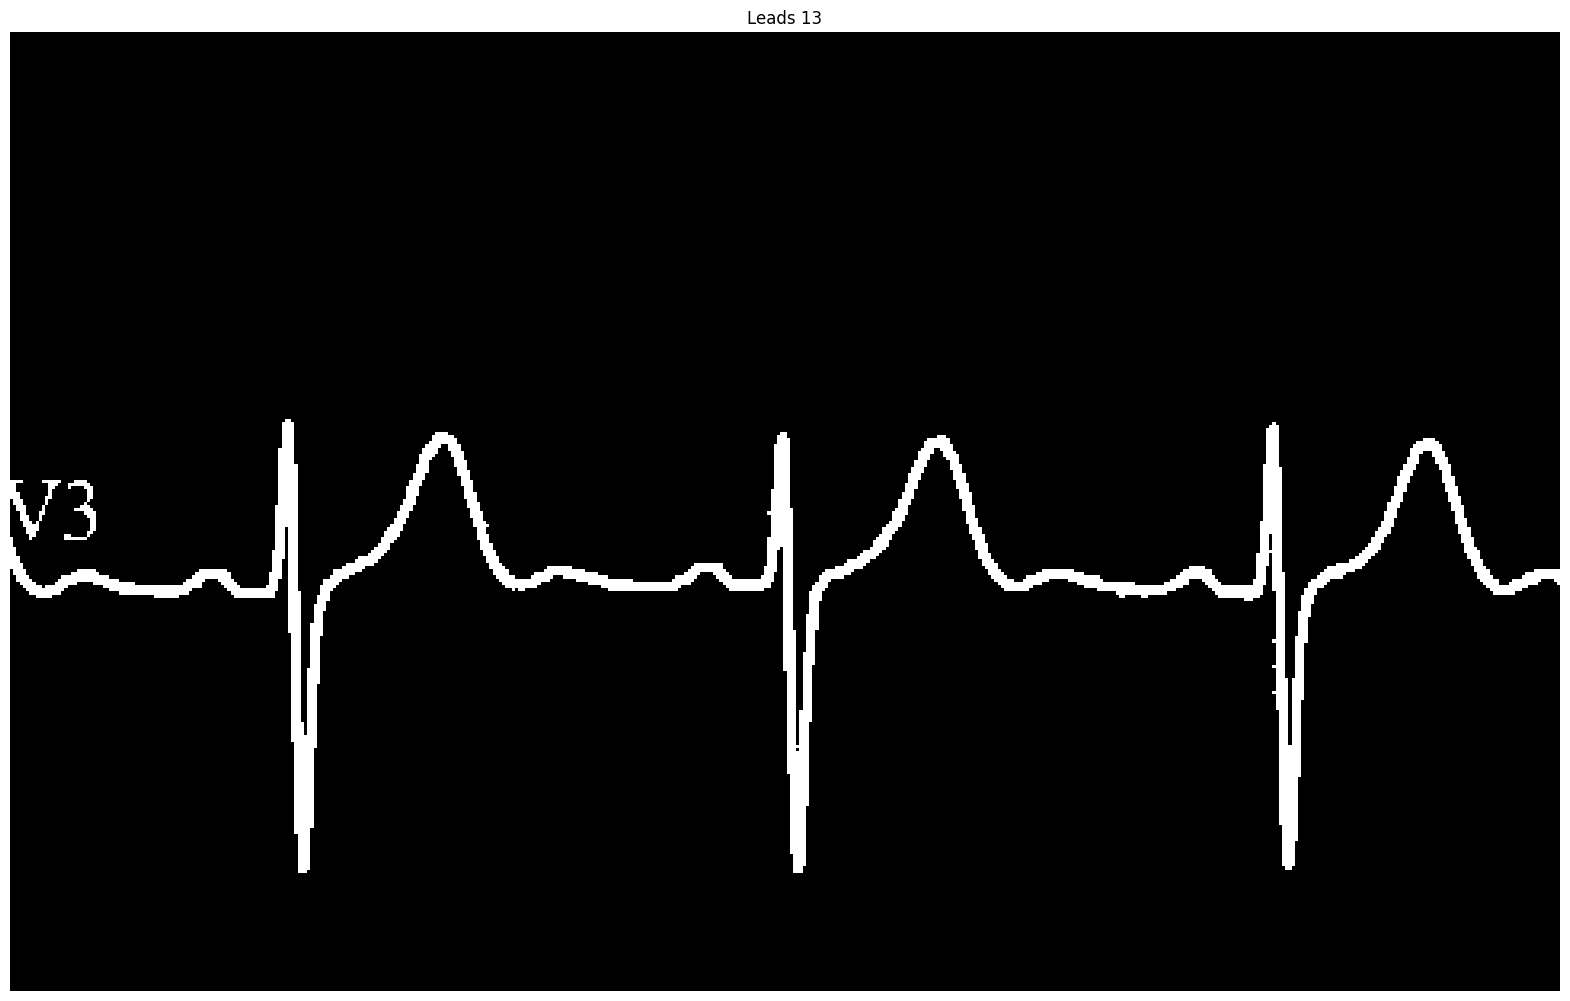

In [ ]:
#plotting lead 13
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(20, 20)

#converting to gray scale
grayscale = color.rgb2gray(Lead_11)
#smoothing image
blurred_image = gaussian(grayscale, sigma=0.7)
#thresholding to distinguish foreground and background
#using otsu thresholding for getting threshold value
global_thresh = threshold_otsu(blurred_image)
print(global_thresh)

#creating binary image based on threshold
binary_global = blurred_image < global_thresh
ax3.imshow(binary_global,cmap='gray')
ax3.set_title("Leads 13")
ax3.axis('off')

#### **PERFROM CONTOURS TO SEPERATE ONLY THE SIGNAL FROM IMAGE**

[(1472, 2)]


Text(0.5, 1.0, 'Sample pre-processed Leads 13 image')

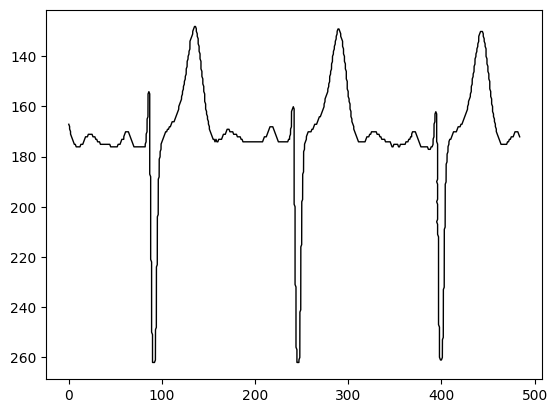

In [ ]:
#import measure
from skimage import measure
import scipy.ndimage as ndimage

#finding contour
contours = measure.find_contours(binary_global,0.9)

# Shows the image with contours found
fig4, ax4 = plt.subplots()

plt.gca().invert_yaxis()

contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
print(contours_shape)
for contour in contours:
  if contour.shape in contours_shape:
    test = resize(contour, (255, 2))
    ax4.plot(contour[:, 1], contour[:, 0],linewidth=1,color='black')
ax1.axis('image')
ax1.set_title("Sample pre-processed Leads 13 image")

In [ ]:
contours_shape = sorted([x.shape for x in contours])[::-1][0:3]
contours_shape

[(1472, 2), (1447, 2), (56, 2)]

In [ ]:
test.shape

(255, 2)

#### **CONVERT IMAGE TO SIGNAL**

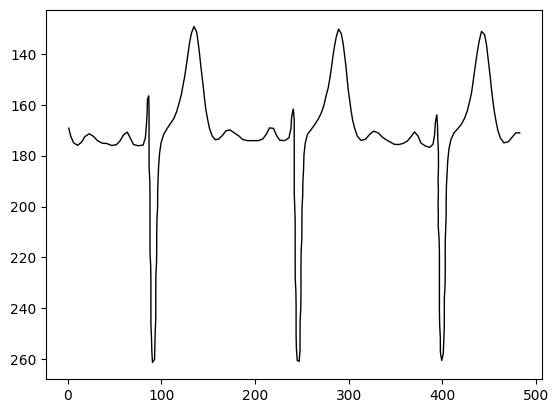

In [ ]:
#converting image to signal

#import pandas
import pandas as pd

#convert contour to dataframe
df = pd.DataFrame(test, columns = ['X','Y'])
fig5, ax5 = plt.subplots()

plt.gca().invert_yaxis()

#plot the image
ax5.plot(df['Y'],df['X'],linewidth=1,color='black',linestyle='solid')

#save the image
fig5.savefig('Lead13_Signal.png')

#### **SAVE SIGNAL TO CSV FORMAT**

In [ ]:
#convert to CSV
df.to_csv('data.csv',index=False)

#View CSV data for verification
test_df=pd.read_csv('data.csv')
test_df

X           Y
0    171.053771  482.580818
1    171.005638  478.470641
2    172.757319  474.487760
3    174.510390  470.497745
4    174.951992  465.748362
..          ...         ...
250  174.713780   14.814748
251  175.915311   10.570161
252  174.956834    6.370111
253  172.354384    3.324481
254  169.203222    1.213352

[255 rows x 2 columns]

#### **SCALING THE DATA & STORE IN CSV**

In [ ]:
#scaling the data and testing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

fit_transform_data = scaler.fit_transform(df)
Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
Normalized_Scaled

X         Y
0    0.316780  1.000000
1    0.316416  0.991461
2    0.329678  0.983187
3    0.342951  0.974898
4    0.346294  0.965032
..        ...       ...
250  0.344490  0.028256
251  0.353587  0.019438
252  0.346331  0.010713
253  0.326627  0.004386
254  0.302769  0.000000

[255 rows x 2 columns]

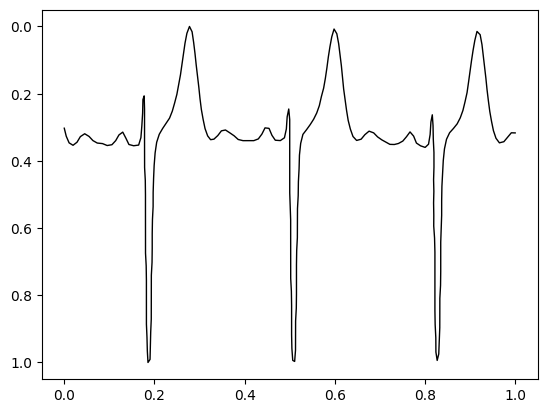

In [ ]:
#plotting scaled data to test signal shape
import pandas as pd

df = pd.DataFrame(Normalized_Scaled, columns = ['X','Y'])

fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(Normalized_Scaled['Y'],Normalized_Scaled['X'],linewidth=1,color='black',linestyle='solid')

In [ ]:
#scaled_data to CSV
Normalized_Scaled.to_csv('scaled_data.csv',index=False)
#reading CSV to test
test_scaled_df=pd.read_csv('scaled_data.csv')
test_scaled_df

X         Y
0    0.316780  1.000000
1    0.316416  0.991461
2    0.329678  0.983187
3    0.342951  0.974898
4    0.346294  0.965032
..        ...       ...
250  0.344490  0.028256
251  0.353587  0.019438
252  0.346331  0.010713
253  0.326627  0.004386
254  0.302769  0.000000

[255 rows x 2 columns]

In [ ]:
# For now save the X axis as a seperate csv file (1D) as it seems to corresponds the high and low points and y axis corresponds to curve/shape.
#scaled_data to CSV
Normalized_Scaled['X'].to_csv('scaled_data_X.csv',index=False)
#reading CSV to test
test_scaled_df_X=pd.read_csv('scaled_data_X.csv')
test_scaled_df_X.shape

(255, 1)

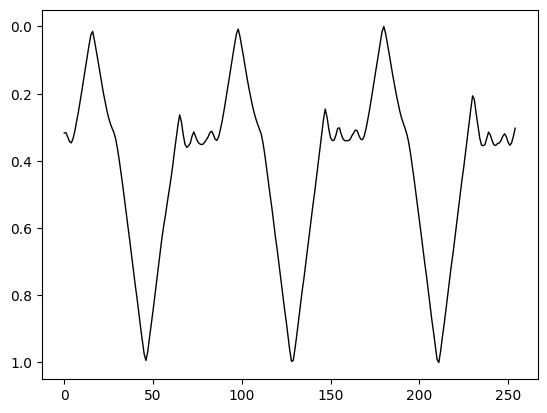

In [ ]:
#plotting 1D signal
import pandas as pd

test_plot_df = pd.DataFrame(test_scaled_df_X, columns = ['X'])
fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(test_plot_df,linewidth=1,color='black',linestyle='solid')

#### **TRANSPOSE THE DATAFRAME**

In [ ]:
#transpose the 1D scaled dataframe
test_transpose = test_scaled_df_X.T
test_transpose

0         1         2         3         4         5         6    \
X  0.31678  0.316416  0.329678  0.342951  0.346294  0.332653  0.310122   

        7         8         9    ...      245       246       247       248  \
X  0.282325  0.252919  0.220942  ...  0.34694  0.339626  0.327238  0.319271   

        249      250       251       252       253       254  
X  0.327802  0.34449  0.353587  0.346331  0.326627  0.302769  

[1 rows x 255 columns]

#### **FUNCTION TO EXTRACT IMAGE LEADS(1-13) (FEATURE EXTRACTION)**

In [ ]:
"""#### **FUNCTION FOR  IMAGE LEADS(1-13) PRE-PROCESSING**"""
def Convert_Image_Lead(image_file,parent_folder):
    #read the image
    image=imread('{parent}/{image_file}'.format(parent=str(parent_folder),image_file=str(image_file)),plugin='matplotlib')
    #dividing the ECG leads from 1-13 from the above image
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1626]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1626]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1626]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]

    #list of leads
    Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

    #folder_name to store lead_images
    folder_name= re.sub('.jpg', '',image_file)

    #loop through leads and create seperate images
    for x,y in enumerate(Leads):
      fig , ax = plt.subplots()
      #fig.set_size_inches(20, 20)
      ax.imshow(y)
      ax.axis('off')
      ax.set_title("Leads {0}".format(x+1))
      if (os.path.exists(parent_folder+'/'+folder_name)):
        pass
      else:
        os.makedirs(parent_folder+'/'+folder_name)

      #save the image
      plt.close('all')
      plt.ioff()
      fig.savefig('{parent}/{folder_name}/Lead_{x}_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent_folder))

    extract_signal_leads(Leads,folder_name,parent_folder)


In [ ]:
#extract_only signal from images
def extract_signal_leads(Leads,folder_name,parent):
  #looping through image list containg all leads from 1-13
  for x,y in enumerate(Leads):
    #creating subplot
    fig1 , ax1 = plt.subplots()

    #set fig size
    #fig1.set_size_inches(20, 20)

    #converting to gray scale
    grayscale = color.rgb2gray(y)
    #smoothing image
    blurred_image = gaussian(grayscale,sigma=0.7)
    #thresholding to distinguish foreground and background
    #using otsu thresholding for getting threshold value
    global_thresh = threshold_otsu(blurred_image)

    #creating binary image based on threshold
    binary_global = blurred_image < global_thresh

    #resize image
    if x!=12:
      binary_global = resize(binary_global, (300, 450))

    ax1.imshow(binary_global,cmap="gray")
    ax1.axis('off')
    ax1.set_title("pre-processed Leads {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig1.savefig('{parent}/{folder_name}/Lead_{x}_preprocessed_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))

    fig7 , ax7 = plt.subplots()
    plt.gca().invert_yaxis()

    #find contour and get only the necessary signal contour
    contours = measure.find_contours(binary_global,0.8)
    contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
    for contour in contours:
      if contour.shape in contours_shape:
        test = resize(contour, (255, 2))
        ax7.plot(test[:, 1], test[:, 0],linewidth=1,color='black')
    ax7.axis('image')
    ax7.set_title("Contour {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig7.savefig('{parent}/{folder_name}/Lead_{x}_Contour_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))
    lead_no=x
    #convert_csv(test,lead_no,folder_name,parent)
    #scale_csv(test,lead_no,folder_name,parent)
    scale_csv_1D(test,lead_no,folder_name,parent)

In [ ]:
def convert_csv(test,lead_no,folder_name,parent):
#convert contour to dataframe
  target=folder_name[0:2]
  df = pd.DataFrame(test, columns = ['X','Y'])
  df['Target']=target
  #x_axis= 'Lead_{lead_no}_X'.format(lead_no=lead_no)
  #y_axis= 'Lead_{lead_no}_Y'.format(lead_no=lead_no)
  fig5, ax5 = plt.subplots()
  #convert to CSV
  df.to_csv('{parent}/{folder_name}/{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv(test,lead_no,folder_name,parent):
  #scaling the data and testing
  target=folder_name[0:2]
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv_1D(test,lead_no,folder_name,parent):
  target=folder_name[0:2]
  #scaling the data and testing
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data[:,0], columns = ['X'])
  fig6, ax6 = plt.subplots()
  plt.gca().invert_yaxis()
  ax6.plot(Normalized_Scaled,linewidth=1,color='black',linestyle='solid')
  plt.close('all')
  plt.ioff()
  fig6.savefig('{parent}/{folder_name}/ID_Lead_{lead_no}_Signal.png'.format(folder_name=folder_name,lead_no=lead_no+1,parent=parent))
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

In [ ]:
import os
import re
from skimage.filters import threshold_otsu,gaussian
from skimage import measure
import pandas as pd
import numpy as nm
from sklearn.preprocessing import MinMaxScaler
from skimage.io import imread
from skimage import color
from skimage.transform import resize
from numpy import asarray
import matplotlib.pyplot as plt

#extract_only signal from images
def extract_signal_leads(Leads,folder_name,parent):
  #looping through image list containg all leads from 1-13
  for x,y in enumerate(Leads):
    #creating subplot
    fig1 , ax1 = plt.subplots()

    #set fig size
    #fig1.set_size_inches(20, 20)

    #converting to gray scale
    grayscale = color.rgb2gray(y)
    #smoothing image
    blurred_image = gaussian(grayscale,sigma=0.7)
    #thresholding to distinguish foreground and background
    #using otsu thresholding for getting threshold value
    global_thresh = threshold_otsu(blurred_image)

    #creating binary image based on threshold
    binary_global = blurred_image < global_thresh

    #resize image
    if x!=12:
      binary_global = resize(binary_global, (300, 450))

    ax1.imshow(binary_global,cmap="gray")
    ax1.axis('off')
    ax1.set_title("pre-processed Leads {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig1.savefig('{parent}/{folder_name}/Lead_{x}_preprocessed_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))

    fig7 , ax7 = plt.subplots()
    plt.gca().invert_yaxis()

    #find contour and get only the necessary signal contour
    contours = measure.find_contours(binary_global,0.8)
    contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
    for contour in contours:
      if contour.shape in contours_shape:
        test = resize(contour, (255, 2))
        ax7.plot(test[:, 1], test[:, 0],linewidth=1,color='black')
    ax7.axis('image')
    ax7.set_title("Contour {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig7.savefig('{parent}/{folder_name}/Lead_{x}_Contour_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))
    lead_no=x
    #convert_csv(test,lead_no,folder_name,parent)
    #scale_csv(test,lead_no,folder_name,parent)
    scale_csv_1D(test,lead_no,folder_name,parent)

"""#### **FUNCTION FOR  IMAGE LEADS(1-13) PRE-PROCESSING**"""
def Convert_Image_Lead(image_file,parent_folder):
    #read the image
    image=imread('{parent}/{image_file}'.format(parent=str(parent_folder),image_file=str(image_file)),plugin='matplotlib')
    #dividing the ECG leads from 1-13 from the above image
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1626]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1626]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1626]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]

    #list of leads
    Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

    #folder_name to store lead_images
    folder_name= re.sub('.jpg', '',image_file)

    #loop through leads and create seperate images
    for x,y in enumerate(Leads):
      fig , ax = plt.subplots()
      #fig.set_size_inches(20, 20)
      ax.imshow(y)
      ax.axis('off')
      ax.set_title("Leads {0}".format(x+1))
      if (os.path.exists(parent_folder+'/'+folder_name)):
        pass
      else:
        os.makedirs(parent_folder+'/'+folder_name)

      #save the image
      plt.close('all')
      plt.ioff()
      fig.savefig('{parent}/{folder_name}/Lead_{x}_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent_folder))

    extract_signal_leads(Leads,folder_name,parent_folder)


def convert_csv(test,lead_no,folder_name,parent):
#convert contour to dataframe
  target=folder_name[0:2]
  df = pd.DataFrame(test, columns = ['X','Y'])
  df['Target']=target
  #x_axis= 'Lead_{lead_no}_X'.format(lead_no=lead_no)
  #y_axis= 'Lead_{lead_no}_Y'.format(lead_no=lead_no)
  fig5, ax5 = plt.subplots()
  #convert to CSV
  df.to_csv('{parent}/{folder_name}/{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv(test,lead_no,folder_name,parent):
  #scaling the data and testing
  target=folder_name[0:2]
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv_1D(test,lead_no,folder_name,parent):
  target=folder_name[0:2]
  #scaling the data and testing
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data[:,0], columns = ['X'])
  fig6, ax6 = plt.subplots()
  plt.gca().invert_yaxis()
  ax6.plot(Normalized_Scaled,linewidth=1,color='black',linestyle='solid')
  plt.close('all')
  plt.ioff()
  fig6.savefig('{parent}/{folder_name}/ID_Lead_{lead_no}_Signal.png'.format(folder_name=folder_name,lead_no=lead_no+1,parent=parent))
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

#load the different types of folders
normal_parent_dir = '/content/drive/MyDrive/ECG_IMAGES_DATASET/Normal Person ECG Images (284x12=3408)/'
abnormal_parent_dir = '/content/drive/MyDrive/ECG_IMAGES_DATASET/ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
MI_parent_dir = '/content/drive/MyDrive/ECG_IMAGES_DATASET/ECG Images of Myocardial Infarction Patients (240x12=2880)'
MI_history_parent_dir = '/content/drive/MyDrive/ECG_IMAGES_DATASET/ECG Images of Patient that have History of MI (172x12=2064)'

#Types of heart. Now taking only 3. will work on COVID-19 later
Types_ECG = {'Abnormal_hear_beat':abnormal_parent_dir,'MI':MI_parent_dir,'History_MI':MI_history_parent_dir,'Normal':normal_parent_dir}

#Types_ECG_test = {'Abnormal':abnormal_parent_dir}

#### parse all the files in the different folders and peform all the above steps as mentioned in the analysis Sample.

#loop through folder/files and create seperate images of different leads
for types,folder in Types_ECG.items():
  for files in os.listdir(folder):
    #if files.endswith(".jpg"):
    with open(os.path.join(folder, files), 'r') as f:
      Convert_Image_Lead(files,folder)

In [ ]:
import pandas as pd
import numpy as np
import os
from natsort import natsorted
import joblib

In [ ]:
#creating list to store file_names
NORMAL_=[]
MI_=[]
PMI_=[]
HB_=[]

normal = '/content/drive/MyDrive/preprocessed_1d/NORMAL'
abnormal = '/content/drive/MyDrive/preprocessed_1d/AHB'
MI = '/content/drive/MyDrive/preprocessed_1d/MI'
MI_history = '/content/drive/MyDrive/preprocessed_1d/PM'

Types_ECG = {'normal':normal,'Abnormal_hear_beat':abnormal,'MI':MI,'History_MI':MI_history}

for types,folder in Types_ECG.items():
  for files in os.listdir(folder):
    if types=='normal':
      NORMAL_.append(files)
    elif types=='Abnormal_hear_beat':
      HB_.append(files)
    elif types=='MI':
      MI_.append(files)
    elif types=='History_MI':
      PMI_.append(files)

In [ ]:
NORMAL_ = natsorted(NORMAL_)
NORMAL_

['scaled_data_1D_1.csv',
 'scaled_data_1D_2.csv',
 'scaled_data_1D_3.csv',
 'scaled_data_1D_4.csv',
 'scaled_data_1D_5.csv',
 'scaled_data_1D_6.csv',
 'scaled_data_1D_7.csv',
 'scaled_data_1D_8.csv',
 'scaled_data_1D_9.csv',
 'scaled_data_1D_10.csv',
 'scaled_data_1D_11.csv',
 'scaled_data_1D_12.csv',
 'scaled_data_1D_13.csv']

In [ ]:
MI_ = natsorted(MI_)
MI_

['scaled_data_1D_1.csv',
 'scaled_data_1D_2.csv',
 'scaled_data_1D_3.csv',
 'scaled_data_1D_4.csv',
 'scaled_data_1D_5.csv',
 'scaled_data_1D_6.csv',
 'scaled_data_1D_7.csv',
 'scaled_data_1D_8.csv',
 'scaled_data_1D_9.csv',
 'scaled_data_1D_10.csv',
 'scaled_data_1D_11.csv',
 'scaled_data_1D_12.csv',
 'scaled_data_1D_13.csv']

In [ ]:
PMI_ = natsorted(PMI_)
PMI_

['scaled_data_1D_1.csv',
 'scaled_data_1D_2.csv',
 'scaled_data_1D_3.csv',
 'scaled_data_1D_4.csv',
 'scaled_data_1D_5.csv',
 'scaled_data_1D_6.csv',
 'scaled_data_1D_7.csv',
 'scaled_data_1D_8.csv',
 'scaled_data_1D_9.csv',
 'scaled_data_1D_10.csv',
 'scaled_data_1D_11.csv',
 'scaled_data_1D_12.csv',
 'scaled_data_1D_13.csv']

In [ ]:
HB_ = natsorted(HB_)
HB_

['scaled_data_1D_1.csv',
 'scaled_data_1D_2.csv',
 'scaled_data_1D_3.csv',
 'scaled_data_1D_4.csv',
 'scaled_data_1D_5.csv',
 'scaled_data_1D_6.csv',
 'scaled_data_1D_7.csv',
 'scaled_data_1D_8.csv',
 'scaled_data_1D_9.csv',
 'scaled_data_1D_10.csv',
 'scaled_data_1D_11.csv',
 'scaled_data_1D_12.csv',
 'scaled_data_1D_13.csv']

In [ ]:
#loop over and create combined csv files for each leads.
for x in range(len(MI_)):
  df1=pd.read_csv('/content/drive/MyDrive/preprocessed_1d/NORMAL/{}'.format(NORMAL_[x]))
  df2=pd.read_csv('/content/drive/MyDrive/preprocessed_1d/AHB/{}'.format(HB_[x]))
  df3=pd.read_csv('/content/drive/MyDrive/preprocessed_1d/MI/{}'.format(MI_[x]))
  df4=pd.read_csv('/content/drive/MyDrive/preprocessed_1d/PM/{}'.format(PMI_[x]))
  final_df = pd.concat([df1,df2,df3,df4],ignore_index=True)
  final_df.to_csv('/content/drive/MyDrive/Combined_csv/Combined_IDLead_{}.csv'.format(x+1))

In [ ]:
#now reading just lead1
df=pd.read_csv('/content/drive/MyDrive/Combined_csv/Combined_IDLead_1.csv')
df['Target'].unique()

array(['No', 'HB', 'MI', 'PM'], dtype=object)

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
#convert Target column values as Numeric using ngroups
encode_target_label = df.groupby('Target').ngroup().rename("target").to_frame()
test_final  = df.merge(encode_target_label, left_index=True, right_index=True)
test_final.drop(columns=['Target'],inplace=True)
test_final

0         1         2         3         4         5         6  \
0    0.728449  0.680755  0.619010  0.645367  0.681570  0.732488  0.758448   
1    0.957972  0.950695  0.941024  0.930501  0.913601  0.892244  0.868016   
2    0.611084  0.661575  0.695790  0.741113  0.716666  0.595794  0.425022   
3    0.839213  0.861690  0.866457  0.865756  0.855027  0.855606  0.845561   
4    0.917753  0.924369  0.873765  0.791381  0.699513  0.604927  0.500312   
..        ...       ...       ...       ...       ...       ...       ...   
923  0.874246  0.877014  0.864280  0.860505  0.871349  0.912404  0.958148   
924  0.829815  0.832084  0.852396  0.909665  0.988242  1.000000  0.923323   
925  0.469048  0.417983  0.362322  0.351995  0.391493  0.418305  0.440135   
926  0.682510  0.682286  0.641051  0.620212  0.608210  0.576331  0.603596   
927  0.792175  0.815695  0.819518  0.820559  0.847985  0.880933  0.902061   

            7         8         9  ...       246       247       248  \
0    0.750660  0.728282  0.707928  ...  0.637260  0.664539  0.667226   
1    0.855127  0.835307  0.798640  ...  0.778790  0.806883  0.818640   
2    0.286457  0.425022  0.611384  ...  0.000000  0.042690  0.165850   
3    0.843187  0.846784  0.824438  ...  0.789156  0.793622  0.787665   
4    0.446012  0.528910  0.634068  ...  0.200676  0.300147  0.407225   
..        ...       ...       ...  ...       ...       ...       ...   
923  0.977826  0.956314  0.926773  ...  0.908312  0.926328  0.898749   
924  0.821865  0.721302  0.612039  ...  0.429721  0.531567  0.642137   
925  0.444598  0.460402  0.506810  ...  0.408587  0.401864  0.387069   
926  0.645714  0.677964  0.720297  ...  0.452247  0.450421  0.439278   
927  0.878266  0.838806  0.811795  ...  0.737351  0.778845  0.805446   

          249       250       251       252       253       254  target  
0    0.637064  0.593287  0.545503  0.515049  0.563257  0.633581       2  
1    0.842472  0.866740  0.884152  0.897196  0.911293  0.922903       2  
2    0.363445  0.549460  0.539346  0.522272  0.491668  0.454949       2  
3    0.794515  0.796739  0.804063  0.809944  0.801814  0.777322       2  
4    0.507346  0.605953  0.699309  0.790334  0.856593  0.849957       2  
..        ...       ...       ...       ...       ...       ...     ...  
923  0.855709  0.823132  0.815458  0.818083  0.829300  0.822382       3  
924  0.742063  0.833042  0.814867  0.777622  0.760714  0.759294       3  
925  0.359590  0.325879  0.288894  0.293521  0.344504  0.399012       3  
926  0.439086  0.394417  0.441650  0.473909  0.539199  0.547146       3  
927  0.782640  0.751236  0.741331  0.718790  0.714504  0.691004       3  

[928 rows x 256 columns]

In [ ]:
#just for testing
# Now Perform Dimensionality reduction (PCA) on that Dataframe and check
from sklearn.decomposition import PCA

#do PCA and choose componeents as 100
pca = PCA(n_components=100)
x_pca = pca.fit_transform(test_final.iloc[:,0:-1])
x_pca = pd.DataFrame(x_pca)

# Calculate the variance explained by priciple components
explained_variance = pca.explained_variance_ratio_
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

#store the new pca generated dimensions in a dataframe
pca_df = pd.DataFrame(data = x_pca)
target = pd.Series(test_final['target'], name='target')
result_df = pd.concat([pca_df, target], axis=1)
result_df

Variance of each component: [1.76145888e-01 9.50265614e-02 6.99060614e-02 6.15960001e-02
 5.34876630e-02 4.23664893e-02 3.68320213e-02 3.38541791e-02
 3.00884979e-02 2.90396728e-02 2.64962509e-02 2.42272738e-02
 2.10221030e-02 1.99751559e-02 1.77321042e-02 1.63016802e-02
 1.53898622e-02 1.48412074e-02 1.33644825e-02 1.19674074e-02
 1.16813409e-02 1.05807650e-02 9.68875480e-03 9.47385060e-03
 8.65347748e-03 8.47506998e-03 7.93382172e-03 7.30163338e-03
 6.76380665e-03 6.36886390e-03 6.02004791e-03 5.46823032e-03
 5.31229911e-03 4.97821789e-03 4.74686092e-03 4.46081684e-03
 4.21254684e-03 4.01200243e-03 3.87246476e-03 3.52519084e-03
 3.37596894e-03 3.26978336e-03 3.08241145e-03 2.96423495e-03
 2.73419816e-03 2.50965698e-03 2.35335480e-03 2.25665349e-03
 2.20141761e-03 1.96782025e-03 1.74343954e-03 1.70982830e-03
 1.57456047e-03 1.53704487e-03 1.36768435e-03 1.33167096e-03
 1.26444173e-03 1.20053330e-03 1.18738749e-03 1.08864087e-03
 1.02824532e-03 9.11484783e-04 7.89962329e-04 7.59785111e

0         1         2         3         4         5         6  \
0    1.018578  1.148263 -0.589582  0.193617  0.047950 -0.309400 -0.161566   
1   -1.098692  0.289832 -1.766388  1.076165 -0.261201 -0.820446 -0.474188   
2    0.275021 -0.451289  0.106750 -0.426415  0.066133  0.692474  0.634894   
3   -1.517085  1.662693 -1.021167  0.804267 -0.281985  0.518180  0.355748   
4   -0.152840 -1.046283  0.351278  1.100381 -1.613642  1.484188 -0.113277   
..        ...       ...       ...       ...       ...       ...       ...   
923 -1.321884  2.153021  0.788596 -1.304253  0.458186 -0.859346 -0.069127   
924 -0.867163 -0.040504  0.940680  0.302648 -0.469672 -0.368255  1.065579   
925  3.753012  0.841636 -0.317393 -0.296117  0.593769 -0.255474 -0.057091   
926  0.603083  0.126259  0.003433  0.283612  0.169559 -0.156326 -0.068399   
927 -1.452945  1.233599  0.439472  0.278517  0.165928 -0.171830 -0.075000   

            7         8         9  ...        91        92        93  \
0    0.478471  0.972403 -0.031832  ...  0.012059 -0.004439  0.024013   
1   -0.515238  0.692389  1.501606  ... -0.017526  0.060603 -0.007418   
2   -0.035867  0.815855 -0.909473  ...  0.044992 -0.042018 -0.030653   
3   -0.344235 -0.910867 -0.629517  ...  0.000690  0.041658  0.017861   
4   -0.251152  0.179023 -0.233104  ... -0.009425  0.055198  0.002460   
..        ...       ...       ...  ...       ...       ...       ...   
923 -0.392796  0.755732 -0.584050  ... -0.037069  0.078221 -0.044604   
924  0.801522  0.690113  0.953008  ...  0.012515 -0.093277  0.012789   
925 -0.072048  0.664386 -0.837668  ... -0.008635 -0.006293 -0.004338   
926 -0.184308  0.461063 -0.002047  ...  0.056788  0.023893 -0.015277   
927  0.033859  0.004444 -0.687583  ...  0.011656 -0.032280  0.068809   

           94        95        96        97        98        99  target  
0    0.011910 -0.001045  0.002121 -0.004402 -0.062480 -0.025477       2  
1    0.013602 -0.002482  0.043408  0.027938 -0.041016  0.002399       2  
2    0.120030 -0.049059 -0.024564 -0.014718  0.052764  0.003147       2  
3   -0.052986 -0.036235 -0.016022 -0.018111  0.028668 -0.035337       2  
4    0.031643  0.014630 -0.005385  0.043485 -0.006226 -0.027816       2  
..        ...       ...       ...       ...       ...       ...     ...  
923 -0.030604  0.009632 -0.025407 -0.049929 -0.002087  0.008717       3  
924 -0.027728 -0.014380  0.053584 -0.016416 -0.064521 -0.021221       3  
925  0.004715 -0.023426  0.070032  0.020502 -0.009204 -0.008623       3  
926 -0.080606  0.002377  0.043189 -0.048749  0.022439  0.065301       3  
927 -0.062744  0.016598 -0.072375 -0.003430 -0.055074 -0.024462       3  

[928 rows x 101 columns]

In [ ]:
#Using knn
# Import the necessary modules for ML model
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline steps:
steps = [('knn', KNeighborsClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# have paased less range value of hyperparamter since i'm using free tier version of google colab.
k_range = list(range(1, 9))
parameters = dict(knn__n_neighbors=k_range)

#input
X = result_df.iloc[:,0:-1]

#target
y=result_df.iloc[:,-1]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

#increasing cv score takes lot of time in gooogle colab, so kept it just 2.
cv = GridSearchCV(pipeline,parameters,cv=2)

cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

Knn_Accuracy = cv.score(X_test, y_test)

# Compute and print metrics
print("Accuracy: {}".format(Knn_Accuracy))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.782258064516129
              precision    recall  f1-score   support

           0       0.87      0.63      0.73       105
           1       0.91      0.91      0.91        94
           2       0.72      0.88      0.79       112
           3       0.63      0.67      0.65        61

    accuracy                           0.78       372
   macro avg       0.78      0.77      0.77       372
weighted avg       0.80      0.78      0.78       372

Tuned Model Parameters: {'knn__n_neighbors': 1}


In [ ]:
#Using logistic regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline steps:
steps = [('lr', LogisticRegression())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

#input
X = result_df.iloc[:,0:-1]

#target
y=result_df.iloc[:,-1]

#parameters for gridsearchcv if we increase range of entries from 5 to higher value, we can get greater accurange
c_space = np.logspace(-4, 4, 3)
parameters = {'lr__C': c_space,'lr__penalty': ['l2']}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

#call GridSearchCV and set crossvalscore to 2
cv = GridSearchCV(pipeline,parameters,cv=2)

cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)
LR_Accuracy = cv.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# Compute and print metrics
print("Accuracy: {}".format(LR_Accuracy))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.5456989247311828
              precision    recall  f1-score   support

           0       0.35      0.32      0.34       105
           1       0.73      0.91      0.81        94
           2       0.58      0.58      0.58       112
           3       0.40      0.30      0.34        61

    accuracy                           0.55       372
   macro avg       0.51      0.53      0.52       372
weighted avg       0.52      0.55      0.53       372

Tuned Model Parameters: {'lr__C': 10000.0, 'lr__penalty': 'l2'}


In [ ]:
#using svm
# Import the necessary modules for ML model
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline
steps = [('SVM', SVC())]

pipeline = Pipeline(steps)

#input
X = result_df.iloc[:,0:-1]

#target
y=result_df.iloc[:,-1]

# Specify the hyperparameter space, if we increase the penalty(c) and gamma value the accurancy can be increased.
#since it takes lots of time in google colab provided only a single value
parameters = {'SVM__C':[10],'SVM__gamma':[1]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=21)

cv = GridSearchCV(pipeline,parameters,cv=3)
cv.fit(X_train,y_train)

y_pred = cv.predict(X_test)
SVM_Accuracy = cv.score(X_test, y_test)

# Compute and print metrics
SVM_Accuracy=cv.score(X_test, y_test)

print("Accuracy: {}".format(SVM_Accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.8225806451612904
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        93
           1       1.00      1.00      1.00        99
           2       1.00      0.61      0.76       117
           3       1.00      0.68      0.81        63

    accuracy                           0.82       372
   macro avg       0.90      0.82      0.83       372
weighted avg       0.90      0.82      0.83       372



In [ ]:
#combining all 12 leads in a single csv
location= '/content/drive/MyDrive/Combined_csv'
for files in natsorted(os.listdir(location)):
  if files.endswith(".csv") and not files.endswith("13.csv"):
    if files!='Combined_IDLead_1.csv':
      df=pd.read_csv('/content/drive/MyDrive/Combined_csv/{}'.format(files))
      df.drop(columns=['Unnamed: 0'],inplace=True)
      test_final=pd.concat([test_final,df],axis=1,ignore_index=True)
      test_final.drop(columns=test_final.columns[-1],axis=1,inplace=True)

#drop the target column
test_final.drop(columns=[255],axis=1,inplace=True)
test_final

0         1         2         3         4         5         6     \
0    0.728449  0.680755  0.619010  0.645367  0.681570  0.732488  0.758448   
1    0.957972  0.950695  0.941024  0.930501  0.913601  0.892244  0.868016   
2    0.611084  0.661575  0.695790  0.741113  0.716666  0.595794  0.425022   
3    0.839213  0.861690  0.866457  0.865756  0.855027  0.855606  0.845561   
4    0.917753  0.924369  0.873765  0.791381  0.699513  0.604927  0.500312   
..        ...       ...       ...       ...       ...       ...       ...   
923  0.874246  0.877014  0.864280  0.860505  0.871349  0.912404  0.958148   
924  0.829815  0.832084  0.852396  0.909665  0.988242  1.000000  0.923323   
925  0.469048  0.417983  0.362322  0.351995  0.391493  0.418305  0.440135   
926  0.682510  0.682286  0.641051  0.620212  0.608210  0.576331  0.603596   
927  0.792175  0.815695  0.819518  0.820559  0.847985  0.880933  0.902061   

         7         8         9     ...      3051      3052      3053  \
0    0.750660  0.728282  0.707928  ...  0.864067  0.849256  0.854949   
1    0.855127  0.835307  0.798640  ...  0.925865  0.928285  0.946033   
2    0.286457  0.425022  0.611384  ...  0.170137  0.166206  0.207633   
3    0.843187  0.846784  0.824438  ...  0.880043  0.883833  0.870995   
4    0.446012  0.528910  0.634068  ...  0.400774  0.380920  0.439510   
..        ...       ...       ...  ...       ...       ...       ...   
923  0.977826  0.956314  0.926773  ...  0.785103  0.676795  0.579054   
924  0.821865  0.721302  0.612039  ...  0.913404  0.968015  0.992614   
925  0.444598  0.460402  0.506810  ...  0.730354  0.697465  0.714527   
926  0.645714  0.677964  0.720297  ...  0.860939  0.824976  0.783459   
927  0.878266  0.838806  0.811795  ...  0.516381  0.521133  0.521142   

         3054      3055      3056      3057      3058      3059      3060  
0    0.861380  0.875514  0.868763  0.847450  0.805689  0.751761  0.702102  
1    0.947274  0.946394  0.936536  0.920869  0.910320  0.905436  0.876942  
2    0.258184  0.286993  0.304742  0.325659  0.361189  0.451946  0.543373  
3    0.861323  0.864892  0.863552  0.839506  0.805486  0.801828  0.826618  
4    0.505257  0.561538  0.577997  0.566082  0.547642  0.538735  0.527560  
..        ...       ...       ...       ...       ...       ...       ...  
923  0.476613  0.458748  0.565470  0.681896  0.792646  0.871660  0.872789  
924  0.945789  0.876660  0.808906  0.741645  0.736615  0.797729  0.855637  
925  0.745605  0.754952  0.755059  0.755059  0.755093  0.759093  0.767555  
926  0.761391  0.741917  0.770631  0.802701  0.821503  0.846300  0.858795  
927  0.521143  0.522801  0.543166  0.549073  0.564977  0.576139  0.576267  

[928 rows x 3060 columns]

In [ ]:
#write the final file to csv
test_final.to_csv('final_1D.csv',header=False,index=False)

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=400)
x_pca = pca.fit_transform(test_final)
x_pca = pd.DataFrame(x_pca)


explained_variance = pca.explained_variance_ratio_
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

pca_df = pd.DataFrame(data = x_pca)
target = pd.Series(result_df.iloc[:,-1], name='target')
final_result_df = pd.concat([pca_df, target], axis=1)
final_result_df

Variance of each component: [8.04649534e-02 4.68818003e-02 3.76212504e-02 2.94708618e-02
 2.57031130e-02 2.32574514e-02 2.14376788e-02 2.04315151e-02
 1.94482863e-02 1.79877408e-02 1.64766264e-02 1.53241665e-02
 1.50689862e-02 1.41398267e-02 1.36330466e-02 1.33375324e-02
 1.26355566e-02 1.25577001e-02 1.16968257e-02 1.11671338e-02
 1.07975552e-02 1.06183806e-02 1.03402122e-02 1.01248410e-02
 9.73197948e-03 9.25504395e-03 9.16367637e-03 8.76267060e-03
 8.54270112e-03 8.20665462e-03 8.07642149e-03 7.90742343e-03
 7.54929819e-03 7.21938018e-03 7.07604659e-03 6.89135251e-03
 6.80575532e-03 6.71875790e-03 6.38252148e-03 6.33951897e-03
 6.10254734e-03 5.94560955e-03 5.76371295e-03 5.71788829e-03
 5.55354810e-03 5.42316932e-03 5.35640711e-03 5.08429353e-03
 5.03302777e-03 4.96811576e-03 4.87696491e-03 4.63686128e-03
 4.55349933e-03 4.45390625e-03 4.31579996e-03 4.28316592e-03
 4.17213140e-03 4.12346241e-03 4.09072049e-03 3.99349122e-03
 3.92129459e-03 3.81982060e-03 3.78116652e-03 3.73307150e

0         1         2         3         4         5         6  \
0   -0.457260  0.433402 -0.951313 -0.118767  0.372034  1.917341  0.503248   
1   -1.482871 -3.923833  1.001672  1.151786 -0.105634  0.935446  0.061538   
2    6.524849 -0.064380 -2.177830 -0.744632 -3.160053 -2.079289  1.991373   
3   -4.626337 -0.901579 -1.351431 -1.767117  0.870166  2.210025  3.710694   
4   -3.863027 -2.805259 -0.428457 -0.482452  0.231498  1.977056  1.605510   
..        ...       ...       ...       ...       ...       ...       ...   
923 -3.365774 -2.530997 -0.781861  0.567793  1.960806  2.319130  3.632739   
924 -6.340754  0.634164 -3.259888  2.894988  2.625952 -1.435685  1.570297   
925 -2.106097  4.489429  4.740686  2.521037  1.810682  1.252919 -0.925497   
926 -1.091978  7.063249  2.692234 -0.543705 -0.443376  1.028903 -1.749000   
927  6.346374 -3.865858  6.209416  1.247192  0.112905  0.278156 -0.507665   

            7         8         9  ...       391       392       393  \
0   -0.996278 -2.306744 -1.294890  ...  0.036288 -0.056070 -0.079666   
1    1.340459 -4.633610 -0.483502  ...  0.135785  0.138361 -0.057407   
2    2.629458  1.251710  1.656291  ...  0.011281  0.058222 -0.015391   
3   -1.478115 -2.406238 -3.754295  ...  0.001225  0.052570 -0.095052   
4   -0.603866 -1.312170  3.553396  ...  0.060494 -0.038743 -0.232999   
..        ...       ...       ...  ...       ...       ...       ...   
923  2.072028  0.318600  1.423024  ... -0.050040  0.087980  0.063053   
924  0.456509 -0.855480  0.523852  ...  0.047040  0.223909  0.040667   
925  2.413092 -0.426080 -2.335654  ... -0.078111  0.060498  0.035414   
926  0.469497 -0.575796 -1.181286  ... -0.007768  0.213547  0.087312   
927 -0.342197 -0.152731 -3.172417  ... -0.073928  0.009127  0.195761   

          394       395       396       397       398       399  target  
0   -0.033322  0.092953 -0.223464 -0.087335 -0.175004 -0.075641       2  
1   -0.033161  0.113756 -0.043011 -0.101528  0.033143  0.046450       2  
2    0.062480 -0.061147 -0.098417 -0.076859  0.064152  0.026868       2  
3    0.097803 -0.071267  0.058807 -0.032321  0.190235  0.018525       2  
4    0.220606  0.025731  0.065757 -0.147797 -0.064123  0.084780       2  
..        ...       ...       ...       ...       ...       ...     ...  
923 -0.114174 -0.081365  0.013770  0.006416  0.097218 -0.153779       3  
924 -0.110315  0.075218 -0.063114  0.089623 -0.242333 -0.090580       3  
925  0.120403  0.045581  0.169482  0.019405  0.049925  0.034693       3  
926 -0.045907 -0.231891 -0.076610 -0.075511  0.006654  0.114572       3  
927 -0.115239  0.027800 -0.048164  0.105160  0.015642  0.026879       3  

[928 rows x 401 columns]

In [ ]:
#save to dimensionally reduced csv file
final_result_df.to_csv("pca_final.csv")

In [ ]:
import joblib
#save the PCA model
joblib_file='PCA_ECG.pkl'
joblib.dump(pca,joblib_file)

['PCA_ECG.pkl']

In [ ]:
#Using svm
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline
steps = [('SVM', SVC())]

pipeline = Pipeline(steps)

#input
X = final_result_df.iloc[:,:-1]

#target
y=final_result_df.iloc[:,-1]

# Specify the hyperparameter space, if we increase the penalty(c) and gamma value the accurancy can be increased.
#since it takes lots of time in google colab provided only a single value
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=21)

cv = GridSearchCV(pipeline,parameters,cv=3)
cv.fit(X_train,y_train)

y_pred = cv.predict(X_test)
SVM_Accuracy = cv.score(X_test, y_test)

# Compute and print metrics
SVM_Accuracy=cv.score(X_test, y_test)

print("Accuracy: {}".format(SVM_Accuracy))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9051724137931034
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       119
           1       1.00      1.00      1.00       125
           2       0.91      0.89      0.90       140
           3       0.93      0.78      0.84        80

    accuracy                           0.91       464
   macro avg       0.91      0.89      0.90       464
weighted avg       0.91      0.91      0.91       464

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {}".format(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.8491379310344828
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       119
           1       0.98      1.00      0.99       125
           2       0.84      0.87      0.85       140
           3       0.74      0.80      0.77        80

    accuracy                           0.85       464
   macro avg       0.84      0.84      0.84       464
weighted avg       0.85      0.85      0.85       464



In [ ]:
# Import the necessary modules for ML model
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

#input
X = pd.read_csv('final_1D.csv',header=None)

#target
y=final_result_df.iloc[:,-1]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=21)

svm=SVC(C=10,gamma=0.01)

svm.fit(X_train,y_train)

joblib_file='svm_model_test.pkl'
joblib.dump(svm,joblib_file)

['svm_model_test.pkl']

In [ ]:
# Importing required modules
from sklearn import linear_model, tree, ensemble
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
#input
X = final_result_df.iloc[:,0:-1]

#target
y=final_result_df.iloc[:,-1]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# Stacking of ML Models
eclf = VotingClassifier(estimators=[
    ('SVM', SVC(probability=True)),
    ('knn', KNeighborsClassifier()),
    ('rf', ensemble.RandomForestClassifier()),
    ('bayes',GaussianNB()),
    ('logistic',LogisticRegression()),
    ], voting='soft')

In [ ]:
# Hyperparameter Tuning using gridSearch
params = {'SVM__C':[1, 10, 100],
          'SVM__gamma':[0.1, 0.01],
          'knn__n_neighbors': [1,3,5],
          'rf__n_estimators':[300, 400],
          }

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
voting_clf = grid.fit(X_train, y_train)

print(grid.best_params_)
y_pred = voting_clf.predict(X_test)

# Compute and print metrics
Voting_Accuracy=voting_clf.score(X_test, y_test)

print("Accuracy: {}".format(Voting_Accuracy))
print(classification_report(y_test, y_pred))
print(voting_clf.best_params_)

{'SVM__C': 10, 'SVM__gamma': 0.1, 'knn__n_neighbors': 5, 'rf__n_estimators': 400}
Accuracy: 0.9139784946236559
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        80
           1       1.00      1.00      1.00        72
           2       0.85      0.90      0.87        79
           3       0.84      0.79      0.82        48

    accuracy                           0.91       279
   macro avg       0.91      0.90      0.91       279
weighted avg       0.91      0.91      0.91       279

{'SVM__C': 10, 'SVM__gamma': 0.1, 'knn__n_neighbors': 5, 'rf__n_estimators': 400}


In [ ]:
# open a file, where you ant to store the data
file = open('Heart_Disease_Prediction_using_ECG.pkl', 'wb')
# dump information to that file
pickle.dump(voting_clf, file)